In [1]:

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')


In [3]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

frames = gray(pims.open('trackpy-examples/bulk_water/*.png'))

In [4]:
frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: c:\Users\VJ\Desktop\Microbial Analysis\cell-tracking\trackpy-examples\bulk_water\*.png
    Length: 300 frames
    Frame Shape: (424, 640, 4)
    Pixel Datatype: uint8

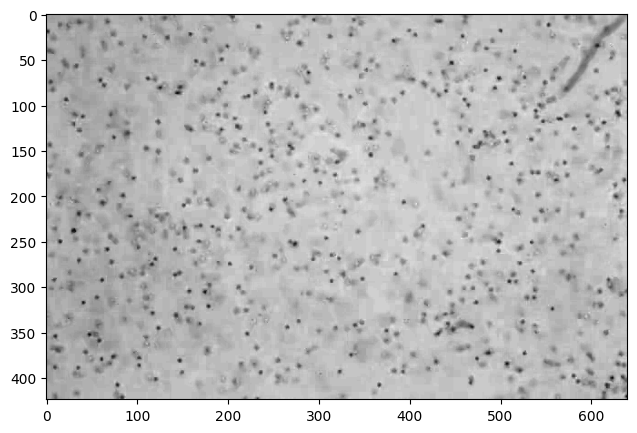

In [5]:
plt.imshow(frames[0])

In [6]:
features = tp.locate(frames[0], 11, invert=True)  # 11 - size of the features(needs to be an odd number) 

In [7]:
features.head()
# mass - intensity/brightness of pixel


,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,4.750000,103.668564,192.862485,2.106615,0.066390,10.808405,10714.0,0.073666,0
1,5.249231,585.779487,164.659302,2.962674,0.078936,4.222033,10702.0,0.075116,0
2,5.785986,294.792544,244.624615,2.244542,0.219217,15.874846,10686.0,0.077141,0
3,5.869369,338.173423,187.458282,2.046201,0.185333,13.088304,10554.0,0.099201,0
4,6.746377,310.584169,151.486558,3.103294,0.053342,4.475355,10403.0,0.147430,0


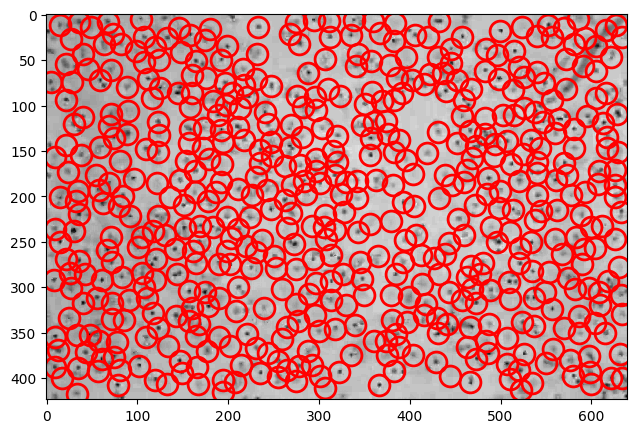

<Axes: >

In [8]:

tp.annotate(features, frames[0])

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

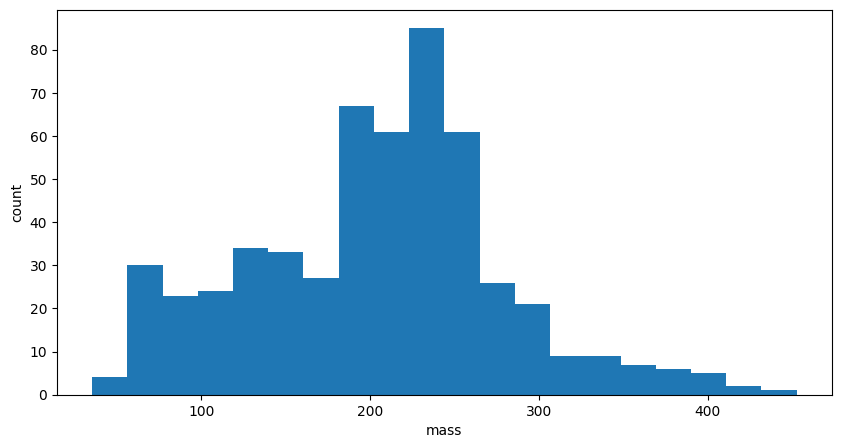

In [9]:

fig, ax = plt.subplots()
ax.hist(features['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

In [10]:
features = tp.locate(frames[0], 11, invert=True, minmass=20)

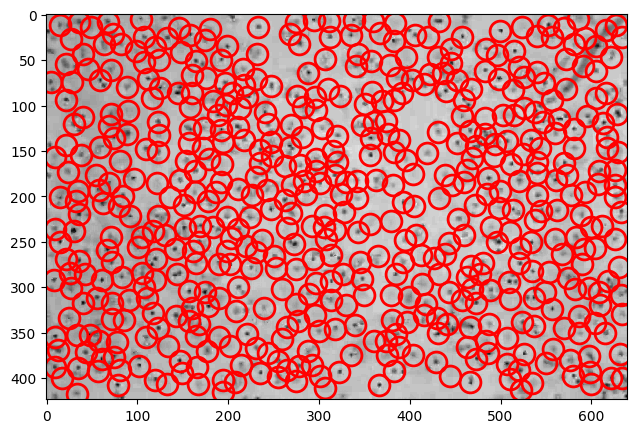

<Axes: >

In [11]:
tp.annotate(features, frames[0])

In [12]:
features = tp.batch(frames[:300], 11, minmass=20, invert=True)    

Frame 299: 624 features


In [13]:
t = tp.link(features, 5, memory=3)
t.head()

Frame 299: 624 trajectories present.


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,4.750000,103.668564,192.862485,2.106615,0.066390,10.808405,10714.0,0.073666,0,0
365,284.118980,25.313881,149.037779,2.321961,0.031799,7.008575,10770.0,0.067577,0,1
364,282.753601,534.788476,222.754482,1.908443,0.103416,15.874846,10415.0,0.141946,0,2
363,280.010398,275.185353,186.782757,2.508665,0.183181,7.261897,10438.0,0.132499,0,3
362,279.134153,252.780324,151.064355,2.938060,0.253812,4.306474,10359.0,0.171764,0,4


In [14]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 13715
After: 1505


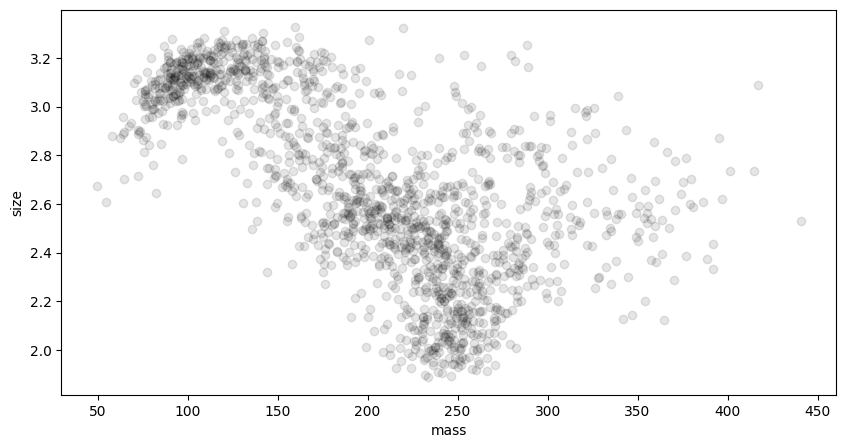

In [15]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [16]:

t2 = t1[((t1['mass'] > 50) & (t1['size'] < 2.6) &
         (t1['ecc'] < 0.3))]
     

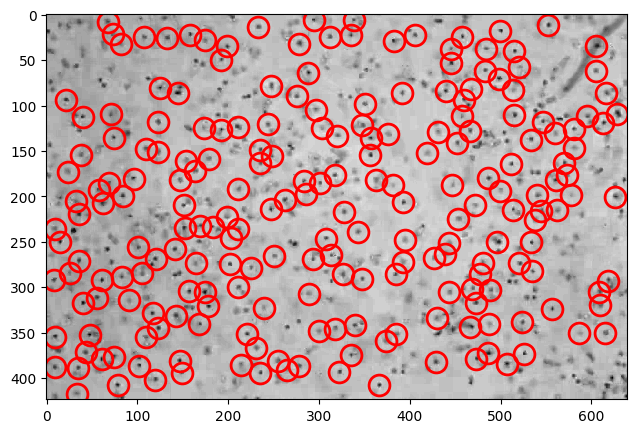

In [17]:

plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0]);

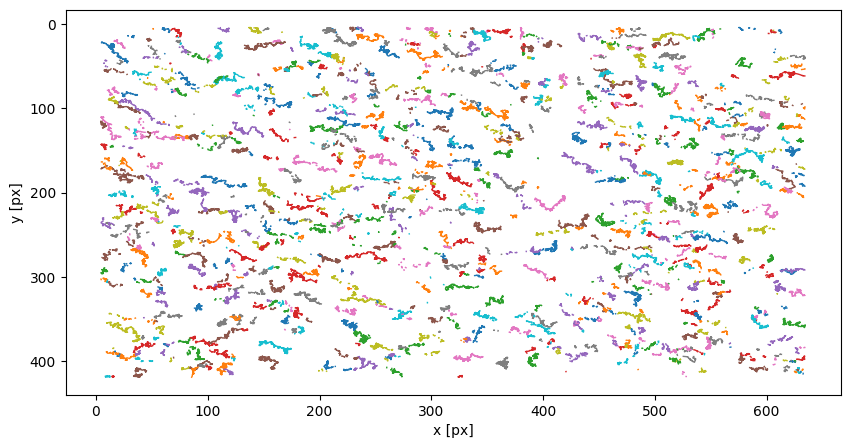

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [18]:
plt.figure()
tp.plot_traj(t2)

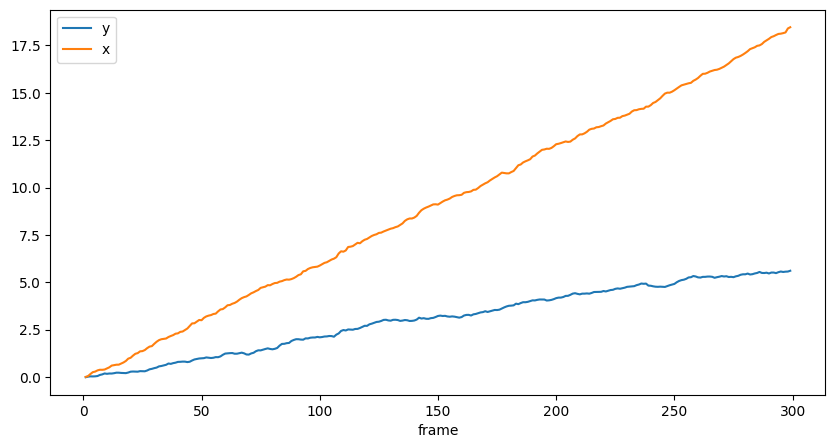

In [19]:

d = tp.compute_drift(t2)

d.plot()
plt.show()

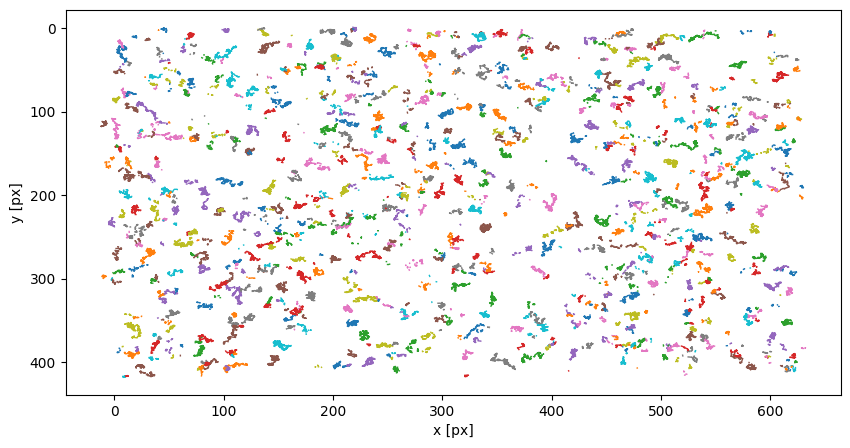

In [20]:

tm = tp.subtract_drift(t2.copy(), d)
     
ax = tp.plot_traj(tm)
plt.show()